In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [27]:
DIRECTROY = 'dataset'
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50
TRAIN_SIZE = 0.8
TEST_SIZE = 0.1
VAL_SIZE = 0.1

In [7]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    DIRECTROY,
    batch_size=BATCH_SIZE,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    shuffle=True,
)

class_names = dataset.class_names

Found 2152 files belonging to 3 classes.


68

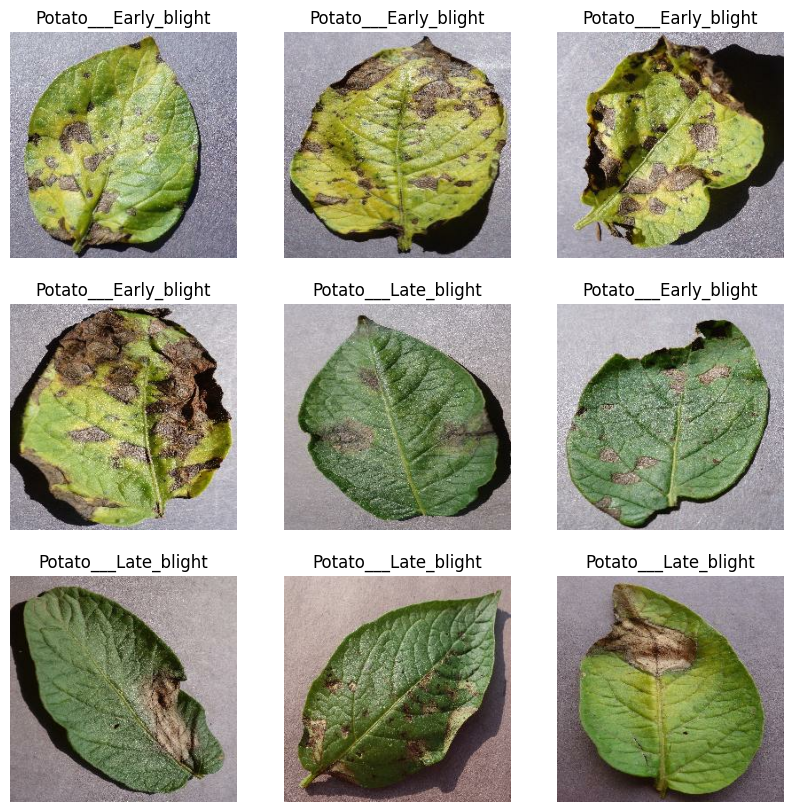

In [16]:
for images, labels in dataset.take(1):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis('off')

In [36]:
def get_dataset_partitions(dataset, train_split=TRAIN_SIZE, val_split=VAL_SIZE, test_split=TEST_SIZE, shuffle=True, shuffle_size=10000):
    if shuffle:
        dataset = dataset.shuffle(shuffle_size, reshuffle_each_iteration=False)

    train_size = int(train_split * len(dataset))
    val_size = int(val_split * len(dataset))

    train_dataset = dataset.take(train_size)
    test_dataset = dataset.skip(train_size)
    val_dataset = test_dataset.take(val_size)
    test_dataset = test_dataset.skip(val_size)

    return train_dataset, val_dataset, test_dataset

train_dataset, val_dataset, test_dataset = get_dataset_partitions(dataset)

# train_dataset = dataset.take(int(len(dataset) * TRAIN_SIZE))
# test_dataset = dataset.skip(int(len(dataset) * TRAIN_SIZE))
# val_dataset = test_dataset.take(int(len(dataset) * VAL_SIZE))
# test_dataset = test_dataset.skip(int(len(val_dataset)))

(54, 6, 8)

In [ ]:
train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_dataset = val_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_dataset = test_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)


In [ ]:
resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    tf.keras.layers.experimental.preprocessing.Rescaling(1. / 255)
])

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
])